In [3]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt

# Лаба 3
**Корешков Михайло, ФІ-91, Варіант 6**

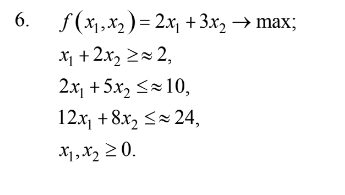

In [8]:
c = np.array([-2, -3]) # -> min
A_le = np.array([
    [-1, -2],
    [2, 5],
    [12, 8]
])
b = np.array([-2, 10, 24])

A_le, b

(array([[-1, -2],
        [ 2,  5],
        [12,  8]]),
 array([-2, 10, 24]))

In [11]:
# базовий розв'язок, від якого відштовхуватимемося
sol1 = sp.optimize.linprog(c, A_le, b)
sol1

     con: array([], dtype=float64)
     fun: -6.72727272638134
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.18181818e+00, 1.50804347e-09, 2.26504682e-09])
  status: 0
 success: True
       x: array([0.90909091, 1.63636364])

In [13]:
A_le @ sol1.x

array([-4.18181818, 10.        , 24.        ])

**Бачимо, що обидві друга та третя умови є рівностями, тобто 'bounding'**

Це означає, що послабляючи саме їх ми можемо дослідити інші розв'язки

In [20]:
# всі значення рівнів, які перевірятимемо
lmbds0 = np.linspace(0,1,5)
# у нас будуть дві лямбди - для кожного обмеження
lmbds0

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [73]:
# максимальна поступка по всіх обмеженнях.
#    0 по першому (бо він не bounding)
#    +200% по іншим

max_relax = np.array([0, 1, 1]) * b * 2.0
max_relax

array([ 0., 20., 48.])

In [71]:
# отримуємо результати оптимізації по всім комбінаціям послаблення обмежень на умови

# для розв'язків
X1 = np.zeros((lmbds0.shape[0],lmbds0.shape[0],2))
# для значень функції
F1 = np.zeros((lmbds0.shape[0],lmbds0.shape[0]))

print("ЗНАЧЕННЯ ЦІЛЬОВОЇ ФУНКЦІЇ")

print("       L2 =  | ",end='')
for L2 in lmbds0:
    print(f"{L2:7.3f} |", end='')
print()
print("             |-",end='')
for L2 in lmbds0:
    print(f"--------|", end='')
print()
    
for i,L1 in enumerate(lmbds0):
    print(f"L1 = {L1:7.3f} | ",end='')
    for j,L2 in enumerate(lmbds0):
        sol = sp.optimize.linprog(c, A_le, b + max_relax*np.array([0, 1-L1, 1-L2]))
        X1[i,j] = sol.x
        F1[i,j] = -sol.fun
        print(f"{-sol.fun:7.3f} |", end='')
    print()

ЗНАЧЕННЯ ЦІЛЬОВОЇ ФУНКЦІЇ
       L2 =  |   0.000 |  0.250 |  0.500 |  0.750 |  1.000 |
             |---------|--------|--------|--------|--------|
L1 =   0.000 |  20.182 | 19.091 | 18.000 | 13.500 |  9.000 |
L1 =   0.250 |  17.909 | 16.818 | 15.727 | 13.500 |  9.000 |
L1 =   0.500 |  15.636 | 14.545 | 13.455 | 12.364 |  9.000 |
L1 =   0.750 |  13.364 | 12.273 | 11.182 | 10.091 |  9.000 |
L1 =   1.000 |  10.000 | 10.000 |  8.909 |  7.818 |  6.727 |


In [86]:
print("ЗНАЧЕННЯ X")

print("       L2 =  |",end='')
for L2 in lmbds0:
    print(f"{L2:9.3f} |", end='')
print()
print("             |-",end='')
for L2 in lmbds0:
    print(f"----------|", end='')
print()
    
for i,L1 in enumerate(lmbds0):
    print(f"L1 = {L1:7.3f} |",end='')
    for j,L2 in enumerate(lmbds0):
        print(f" ({X1[i,j][0]:3.1f} {X1[i,j][1]:3.1f}) |", end='')
    print()

ЗНАЧЕННЯ X
       L2 =  |    0.000 |    0.250 |    0.500 |    0.750 |    1.000 |
             |-----------|----------|----------|----------|----------|
L1 =   0.000 | (2.7 4.9) | (1.4 5.5) | (0.0 6.0) | (0.0 4.5) | (0.0 3.0) |
L1 =   0.250 | (3.6 3.5) | (2.3 4.1) | (0.9 4.6) | (0.0 4.5) | (0.0 3.0) |
L1 =   0.500 | (4.5 2.2) | (3.2 2.7) | (1.8 3.3) | (0.5 3.8) | (0.0 3.0) |
L1 =   0.750 | (5.5 0.8) | (4.1 1.4) | (2.7 1.9) | (1.4 2.5) | (0.0 3.0) |
L1 =   1.000 | (5.0 0.0) | (5.0 0.0) | (3.6 0.5) | (2.3 1.1) | (0.9 1.6) |


## Аналіз

Рядки чи стовпці, в яких значення не змінюються, говорять про те, що інша змінна стала bounding (якщо не зважати на перше обмеження, яке ми не регулюємо)

Бачимо таку поведінку:
- при послабленні обмеження 2 при слабо послабленному обмеженні 3 (обмеження 3 стає ключовим) та
- при послабленні обмеження 3 при слабо посслабленному обмеженні 2 (обмеження 2 стає ключовим)

При тому, при сильно послаблених обох обмеженнях, ніяка не стає bounding - можна далі змінювати обидві

## Графічне зображення задачі та її послаблень
Зелена, синя, червона лінії це відповідно 1, 2 та 3 обмеження. Тут гарно видно як критична лінія обмеження виходить за межі feasible region (виділений синім) при його послабленні

- L1 = 1, L2 = 1. Початковий стан.

    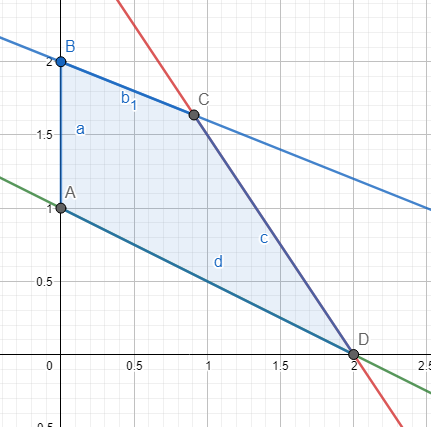
- L1 = 1, L2 = 0.25. Обмеження 2 стає ключовим

    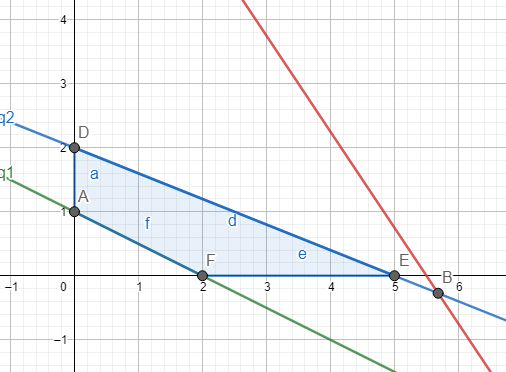
- L1 = 0.5, L2 = 1. Обмеження 3 стає ключовим

    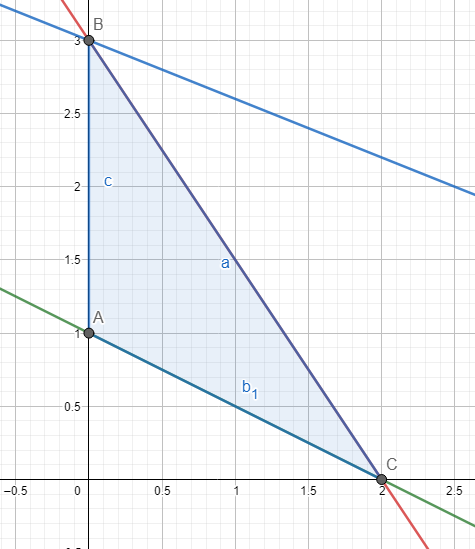